In [527]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

This notebook contains Logistic Regression code.<br>

Have used iris dataset from sklearn module


I have written two programs -<br>
Program-1  (Using Functions)<br>
Program-2 (Using Classes)

## Program 1

In [528]:
iris = load_iris()
X = iris.data[:,:2]
Y = (iris.target!=0)*1

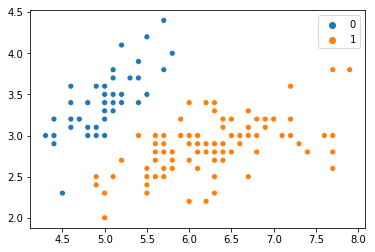

In [529]:
sns.scatterplot(X[:,0],X[:,1],hue=Y)

In [530]:
def cost_fxn(y,y_p):
    m = y.shape[0]
    return (1/m)*np.sum(-y*np.log(y_p)-(1-y)*np.log(1-y_p))

# Testing cost_function 
Y_P = np.array([0.2 if y==0 else 0.8 for y in Y])
cost_fxn(Y,Y_P)

0.22314355131420968

In [531]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [532]:
def gradient_descent_fxn(X,y,learning_rate=0.05,print_cost=False):
    
    # theta initialization with ZEROES
    #theta = np.zeros(X.shape[1])
    
    # theta initialization with NON ZEROES
    theta = np.random.rand(X.shape[1])
        
    num_iters = 1000
    m = y.shape[0]
    
    for i in range(1,num_iters):
        z = np.dot(X,theta)
        h = sigmoid(z)
        
        if print_cost:
            cost = cost_fxn(y,h)
            if i%10==0:
                print('Cost at ',i,'iteration : ',cost)
                
        gradient = (1/m)*np.dot(X.T,(h-y))
        theta = theta - learning_rate*gradient
    
    if print_cost:
        print('Cost at ',num_iters,'iteration : ',cost)

    return theta
    

In [533]:
 def plot_decision_boundary(x,y):
        
    plot_x = np.array([min(x[:,1]) - 2, max(x[:,1]) + 2])
    plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

    sns.scatterplot(x[:,1],x[:,2],color='green',hue=y)
    plt.plot(plot_x, plot_y, label = "Decision_Boundary")
    plt.show()

In [534]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [535]:
theta = gradient_descent_fxn(X,Y,learning_rate=0.05,print_cost=False)
theta # Coefficients

array([-0.51348055,  2.18829773, -3.55790751])

In [536]:
z = np.dot(X,theta)
h = sigmoid(z)
pred = np.array([1 if i>0.5 else 0 for i in h])

(pred==Y).mean() # Accuracy

0.9933333333333333

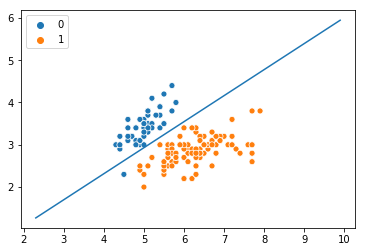

In [537]:
plot_decision_boundary(X,Y)

## Program 2

In [538]:
class LogisticRegression:
    def __init__(self,learning_rate=0.05,num_iters=1000,verbose=False,threshold=0.5):
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.verbose = verbose
        self.threshold = threshold
        self.cost_theta_list = []
        
    def _add_intercept(self,X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X),axis=1)
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cost(self,y,h):
        return (1/y.shape[0])*np.sum(-y*np.log(h)-(1-y)*np.log(1-h))
        
    def fit(self,X,y):
        # Add Intercept
        X = self._add_intercept(X)
        
        # Weights Initialization
        self.theta = np.zeros(X.shape[1])
        
        # Estimate optimal Weight paramater values using gradient descent algo        
        for i in range(self.num_iters):
            z = np.dot(X,self.theta)
            h = self.sigmoid(z)
            
            self.theta = self.theta - self.learning_rate*(1/y.shape[0])*np.dot(X.T,(h-y))
            
            if i%100==0:
                h = self.sigmoid(np.dot(X,self.theta))
                cost = self.cost(y,h)
                self.cost_theta_list.append([self.theta,cost,i])
                if self.verbose:
                    print('Cost at ',i,'iteration: ',cost)
            
    def predict(self,X,probs=True):
        X = self._add_intercept(X)
        z = np.dot(X,self.theta)
        h = self.sigmoid(z)
        if probs:
            return h
        else:
            return np.array([1 if i>self.threshold else 0 for i in h])
    
    def classification_metrics(self,X,y):
        p = self.predict(X,probs=False) 
        
        cm_df = pd.crosstab(p,y,rownames=['Predicted'],colnames=['Actual'])
        print('Confusion Matrix:\n',cm_df)
        
        TN = cm_df.loc[0,0] # Predicted = 0 and  Actual = 0
        TP = cm_df.loc[1,1] # Predicted = 1 and  Actual = 1
        FN = cm_df.loc[0,1] # Predicted  = 0 But Actual = 1
        FP = cm_df.loc[1,0] # Predicted  = 1 But Actual = 0


        acc = (TP+TN)/(TP+TN+FP+FN)
        tpr = recall = TP/(TP+FN) # Recall / Sensitivity / True Positive Rate
        tnr = TN/(TN+FP) # Specificity / True Negative Rate
        precision = TP/(TP+FP) # Precision
        f1_score = 2*precision*recall/(precision+recall) # F1-Score

        return pd.DataFrame({
        'Accuracy':acc.round(3)*100,
        'True Positive Rate':recall.round(3)*100,
        'True Negative Rate':tnr.round(3)*100,
        'Precision':precision.round(3)*100,
        'F1_Score':f1_score.round(3)*100},index=['Perc']).T

    def get_theta(self):        
        return self.theta
    
    def plot_decision_boundary(self,X,Y): 
        plot_x = np.array([min(X[:,0]) - 1, max(X[:,0]) + 1])
        plot_y = (-1/self.theta[2]) * (self.theta[1] * plot_x + self.theta[0])
        sns.scatterplot(X[:,0],X[:,1],color='green',hue=Y)
        plt.plot(plot_x, plot_y, label = "Decision_Boundary")
        plt.show()

    def plot_cost_coeff(self):        
        weights,cost,num_iters = list(zip(*self.cost_theta_list))
        
        sns.scatterplot(num_iters,cost)
        plt.title('Num-Iterations vs Cost')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        
        fig, ax =plt.subplots(1,3,figsize=(20,5))
        sns.scatterplot(list(zip(*weights))[0],cost,ax=ax[0])
        sns.scatterplot(list(zip(*weights))[1],cost,ax=ax[1])
        sns.scatterplot(list(zip(*weights))[2],cost,ax=ax[2])
        for i in range(3):
            ax[i].set_xlabel("Theta "+str(i))
            ax[i].set_ylabel("Cost")
        fig.show()

In [539]:
iris = load_iris()
X = iris.data[:,:2]
Y = (iris.target!=0)*1

In [540]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [541]:
model = LogisticRegression(threshold=0.6,num_iters=3000,verbose=False)
model.fit(X_train,Y_train)
pred = model.predict(X_test,probs=False)

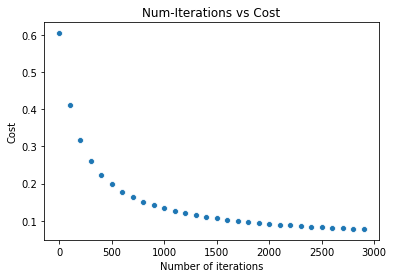

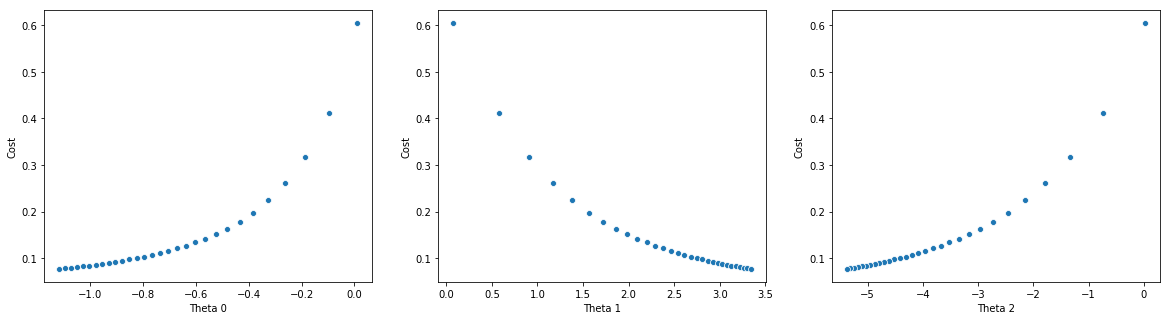

In [542]:
model.plot_cost_coeff()

In [543]:
model.get_theta() # Coefficients

array([-1.13933541,  3.38484865, -5.44072151])

In [544]:
# METRICS REPORT   -TRAIN
model.classification_metrics(X_train,Y_train)

Confusion Matrix:
 Actual      0   1
Predicted        
0          35   0
1           1  84


,Perc
Accuracy,99.2
True Positive Rate,100.0
True Negative Rate,97.2
Precision,98.8
F1_Score,99.4


In [545]:
# METRICS REPORT  - TEST
model.classification_metrics(X_test,Y_test)

Confusion Matrix:
 Actual      0   1
Predicted        
0          14   0
1           0  16


,Perc
Accuracy,100.0
True Positive Rate,100.0
True Negative Rate,100.0
Precision,100.0
F1_Score,100.0


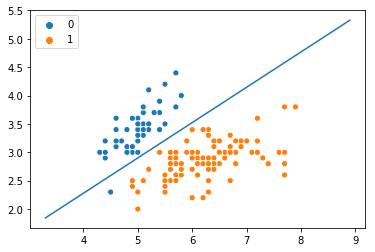

In [546]:
model.plot_decision_boundary(X,Y)  # Decision Boundary for all points

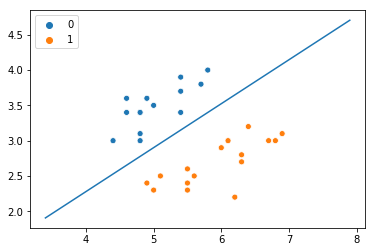

In [547]:
model.plot_decision_boundary(X_test,Y_test) # Decision Boundary for test data points